# Regressão Logística
***

## Importando bibliotecas

In [10]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#Classes do modelo de aprendizado
from sklearn.linear_model import LogisticRegression

#Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [11]:
#Carregando o dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/Francimaria/monitoria-ml/main/Iris.csv')

# Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['Species'] = pd.factorize(dataset['Species'])[0]

In [12]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Separando o conjunto de dados**

In [13]:
#Vamos usar somente duas features PetalLengthCm e PetalWidthCm
X = dataset.iloc[:,[2,3]]
y = dataset.iloc[:,[4]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Treinamento do modelo 

In [14]:
model = LogisticRegression()

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.86      0.92        14
           2       0.87      1.00      0.93        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



### Região de decisão

In [15]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y.values.flatten(), model)
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__)
    plt.show()

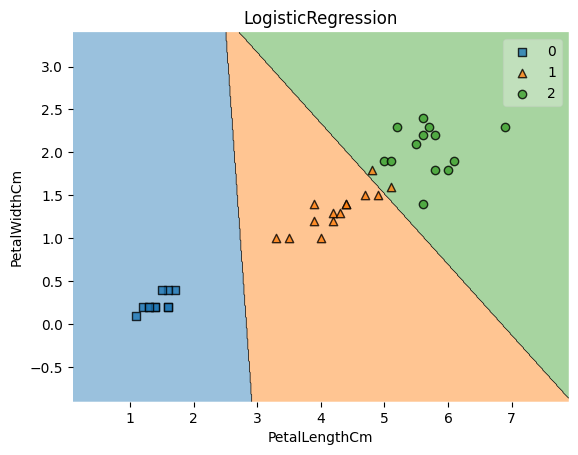

In [16]:
show_decision_region(X_test, y_test, model)

## E se ajustarmos os parâmetros

In [20]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# ... referenciando o modelo
model = LogisticRegression()

#penalty - depende do algoritmo usado para otimização (solver) padrão: ‘lbfgs’ - [‘l2’, None]
# 'none': nenhuma penalidade é adicionada;
# 'l2': adiciona um termo de penalidade L2 e é a escolha padrão;

parameters = {'penalty': ['L2', 'none']}

grid = GridSearchCV(estimator = model,             
                    param_grid = parameters,     
                    scoring = 'f1_macro',          # métrica de avaliação
                    cv = 5 )                        # cross-validation

#treinando o modelo para seleção dos parâmetros
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print("Melhor parametro:", grid.best_params_) 
        
# e ver a sua performance no dataset de teste
print(classification_report(y_test, y_pred))

Melhor parametro: {'penalty': 'none'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.86      0.92        14
           2       0.87      1.00      0.93        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

